# Neural Network - Handwritten Digit Recognition                         

**Objective**: To classify handwritten digits images from 0 to 9.

**Outline**:

1. **Constructing the Model**
    - 1.1 Perceptron
    - 1.2 Neural Network (NN)
    - 1.3 Model Testing
2. **Data Preprocessing**
3. **Model Evaluation**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 42 # set the random seed to 42 for reproducibility

## 1. Constructing the Model

### 1.1 Perceptron

In [3]:
class Perceptron:
  
  # public:
  def __init__(self, alpha_learning_rate, iterations):
    self.alpha_learning_rate = alpha_learning_rate
    self.iterations = iterations
    self.trained = False
  
  def fit(self, X, y):
    self._initialize(X, y)

    for _ in range(self.iterations):
      self._gradient_descent()
    
    self.trained = True

  def predict(self, X):
    if self.trained:
      X = self._add_bias_term(X)

    z = np.dot(X, self.theta)
    y_pred = self._activation_function(z)
    return y_pred
  
  
  # private:
  def _activation_function(self, z):
    unit_step_function = np.where(z > 0, 1, 0)
    return unit_step_function
  
  def _add_bias_term(self, X):
    x_0_bias_term = np.ones(X.shape[0]).reshape((-1, 1))   
    return np.hstack((X, x_0_bias_term)) 

  def _initialize(self, X, y):
    self.m_samples, self.n_features = X.shape

    self.theta = np.zeros(self.n_features + 1).reshape((self.n_features + 1, 1))
    
    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
      X = X.to_numpy()
    self.X = self._add_bias_term(X) 

    if isinstance(y, pd.Series):
      y = y.to_numpy()
    self.y = y.reshape((-1, 1))

  def _gradient_descent(self):
    y_pred = self.predict(self.X)
    d_J_gradient = np.dot(self.X.T, (self.y-y_pred))

    self.theta = self.theta + (self.alpha_learning_rate * d_J_gradient)

### 1.2 Neural Network (NN)

In [4]:
# neural network

### 1.3 Model Testing

In [9]:
# 1. prepare testing dataset
np.random.seed(SEED)

n_samples = 200
X1 = np.random.normal(loc=[2, 2], scale=1, size=(n_samples // 2, 2))
X2 = np.random.normal(loc=[-2, -2], scale=1, size=(n_samples // 2, 2))
X = np.concatenate([X1, X2], axis=0)

y = np.concatenate([np.ones(n_samples // 2), np.zeros(n_samples // 2)], axis=0)


# 2. data splitting (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# 3. training
model = Perceptron(0.01, 10000)
model.fit(X_train, y_train)


# 4. testing
y_pred = model.predict(X_test)

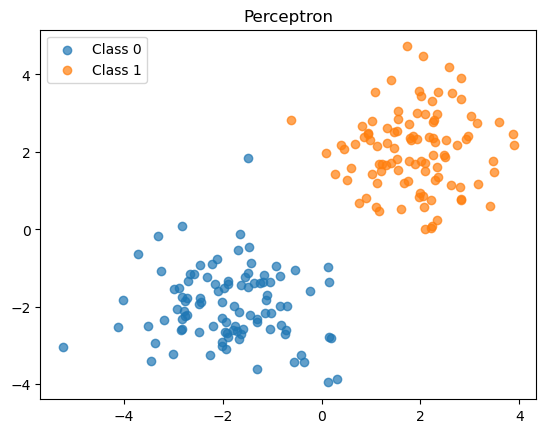

In [13]:
# 5. visualization
plt.title('Perceptron')

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')
plt.legend();

## 2. Data Preprocessing